## Project 3

## <em> Classification and inference with machine learning</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Partner: Faizan Samad </i></span> <br>

<span style="color:red"><i> IMPORTANT!  </i></span> <br>
<span style="color:red"><i> 1. You can work in pairs and exchange ideas, BUT you must run codes in your datahub environment and submit your own work. We will only grade the work you submitted via okpy.  </i></span> <br>
<span style="color:red"><i> 2. Project 3 is STRICTLY due 11:59pm, 12/17. </i></span> <br>
<span style="color:red"><i> 3. During RRR week, we have 4 office hours: </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/9 (M), 3:30-4:30pm, 325 LeConte </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/9 (M), 4:30-5:30pm, 325 LeConte </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/11 (W), 1:00-2:00pm, 325 LeConte </i></span> <br>
<span style="color:red"><i> &nbsp; &nbsp; 12/11(W), 2:00-3:00pm, 251 LeConte </i></span> <br>


***
### Link Okpy

In [1]:
from client.api.notebook import Notebook
ok = Notebook('Project3_188.ok')
_ = ok.auth(inline = True)

Assignment: Project 3
OK, version v1.12.5

Successfully logged in as chancetran@berkeley.edu


### Imports

In [2]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***

#### Problem 1 - Using Keras - MNIST

The goal of this notebook is to introduce deep neural networks (DNNs) and convolutional neural networks (CNNs) using the high-level Keras package and to become familiar with how to choose its architecture, cost function, and optimizer in Keras. We will also learn how to train neural networks.

We will once again work with the MNIST dataset of hand written digits introduced in HW8. The goal is to find a statistical model which recognizes and distinguishes between the ten handwritten digits (0-9).

The MNIST dataset comprises handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task. 

In this Notebook, we show how to use the Keras python package to tackle the MNIST problem with the help of deep neural networks.

## Creating DNNs with Keras

Constructing a Deep Neural Network to solve ML problems is a multiple-stage process. Quite generally, one can identify the key steps as follows:

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model 
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

We would like to emphasize that, while it is always possible to view steps 1-5 as independent of the particular task we are trying to solve, it is only when they are put together in ***step 6*** that the real gain of using Deep Learning is revealed, compared to less sophisticated methods such as the regression models. With this remark in mind, we shall focus predominantly on steps 1-5 below. We show how one can use grid search methods to find optimal hyperparameters in ***step 6***.

### Step 1: Load and Process the Data

Keras knows to download automatically the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape ($({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$). 

The size of each sample, i.e. the number of bare features used is N_features (whis is 784 because we have a $28 \times 28$ pixel grid), while the number of potential classification categories is "num_classes" (which is 10, number of digits).

Each pixel
contains a greyscale value quantified by an integer between
0 and 255. To standardize the dataset, we normalize
the input data in the interval [0, 1]. 

In [3]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train[:40000]
Y_train = Y_train[:40000]

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


Using TensorFlow backend.


<span style="color:blue"> <i> 1. Make a plot of one MNIST digit (2D plot using X data - make sure to reshape it into a $28 \times 28$ matrix) and label it (which digit does it correspond to?). </i></span> <br>

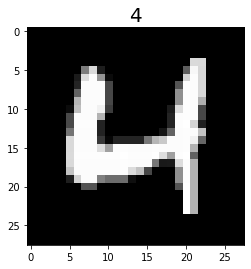

In [4]:
# Assigns random int.
digit = np.random.randint(0, 40000)

# Plots MNIST digit.
plt.imshow(np.reshape(X_train[digit], (28, 28)), cmap = plt.cm.gray)
plt.title(str(Y_train[digit]), fontsize=20)
plt.show()

Last, we cast the label vectors $y$ to binary class matrices (a.k.a. one-hot format).

In [5]:
# convert class vectors to binary class matrices

print("before conversion - ")
print("y vector : \n", Y_train[0:10])

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print("after conversion - ")
print("y vector : \n", Y_train[0:10])

before conversion - 
y vector : 
 [5 0 4 1 9 2 1 3 1 4]
after conversion - 
y vector : 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Here in this template, we use 40000 training samples and 10000 test samples. Remember that we preprocessed data into the shape $({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$.

In [6]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 784)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


### Step 2: Define the Neural Net and its Architecture

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one.

Let us create an instance of Keras' `Sequential()` class, called `model`. As the name suggests, this class allows us to build DNNs layer by layer. (https://keras.io/getting-started/sequential-model-guide/)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# instantiate model
model = Sequential()

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



We use the `add()` method to attach layers to our model. For the purposes of our introductory example, it suffices to focus on `Dense` layers for simplicity. (https://keras.io/layers/core/) Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`.

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

First, add a `Dense` layer with 400 output neurons and `relu` activation function.

In [8]:
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Add another layer with 100 output neurons. Then, we will apply "dropout," a regularization scheme that has been widely adopted in the neural networks literature: during the training procedure neurons
are randomly “dropped out” of the neural network with some
probability $p$ giving rise to a thinned network. It prevents overfitting by reducing spurious correlations between neurons within the network by introducing
a randomization procedure.

In [9]:
model.add(Dense(100, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2888: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Lastly, we need to add a soft-max layer since we have a multi-class output.

In [10]:
model.add(Dense(num_classes, activation='softmax'))

### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function. To optimize the weights of the net, we choose SGD. This algorithm is already available to use under Keras' `optimizers` module (https://keras.io/optimizers/), but we could use `Adam()` or any other built-in one as well. The parameters for the optimizer, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function. 

While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points. 

To complete the definition of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

In [11]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2755: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2759: The name tf.log is deprecated. Please use tf.math.log instead.



### Step 4: Train the model

We train our DNN in minibatches. Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs. 

(The number of epochs is the number of complete passes through the training dataset, and the batch size is a number of samples propagated through the network before the model is updated.)

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or validation data. To monitor the training procedure for every epoch, we set `verbose=True`. 

Let us set `batch_size` = 64 and `epochs` = 10.

In [12]:
# training parameters
batch_size = 64
epochs = 10

# train DNN and store training info in history
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

WARNING  | deprecation.py:323 | From /srv/app/venv/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:899: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:625: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s - loss: 1.2069 - acc: 0.6338 - val_loss: 0.5215 - val_acc: 0.8761
Epoch 2/10
40000/40000 [==============================] - 3s - loss: 0.6062 - acc: 0.8243 - val_loss: 0.3674 - val_acc: 0.9008
Epoch 3/10
40000/40000 [==============================] - 2s - loss: 0.4823 - acc: 0.8633 - val_loss: 0.3117 - val_acc: 0.9136
Epoch 4/10
40000/40000 [==============================] - 2s - loss: 0.4153 - acc: 0.8809 - val_loss: 0.2776 - val_acc: 0.9210
Epoch 5/10
40000/40000 [==============================] - 3s - loss: 0.3798 - acc: 0.8921 - val_loss: 0.2571 - val_acc: 0.9256
Epoch 6/10
40000/40000 [==============================] - 2s - loss: 0.3513 - acc: 0.9001 - val_loss: 0.2381 - val_acc: 0.9319
Epoch 7/10
40000/40000 [==============================] - 2s - loss: 0.3218 - acc: 0.9073 - val_loss: 0.2237 - val_acc: 0.9349
Epoch 8/10
40000/40000 [==============================] - 2s 

### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

 9568/10000 [===========================>..] - ETA: 0sTest loss: 0.19439736566469074
Test accuracy: 0.9417


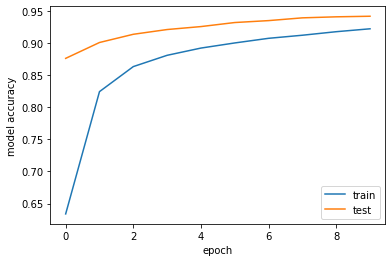

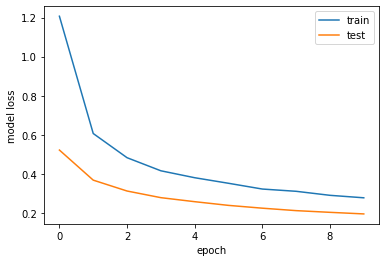

In [13]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

Last, we show how to use the grid search option of scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize the 
hyperparameters of our model.

First, define a function for creating a DNN:

In [14]:
def create_DNN(optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

With epochs = 1 and batch_size = 64, do grid search over the following optimization schemes: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'].

In [15]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 0s     
Epoch 1/1
10000/10000 [==============================] - 0s     
Epoch 1/1
40000/40000 [==============================] - 5s - loss: 0.3199 - acc: 0.9068     


Show the mean test score of all optimization schemes and determine which scheme gives the best accuracy.

In [16]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.951425 using {'optimizer': 'Nadam'}
0.850750 (0.013910) with: {'optimizer': 'SGD'}
0.947575 (0.001199) with: {'optimizer': 'RMSprop'}
0.946500 (0.003155) with: {'optimizer': 'Adagrad'}
0.925950 (0.002566) with: {'optimizer': 'Adadelta'}
0.946875 (0.001474) with: {'optimizer': 'Adam'}
0.934400 (0.002463) with: {'optimizer': 'Adamax'}
0.951425 (0.002451) with: {'optimizer': 'Nadam'}


<span style="color:blue"> <i> 2. Create a DNN with one Dense layer having 200 output neurons. Do the grid search over any 5 different activation functions from https://keras.io/activations/. Let epochs = 1, batches = 64, p_dropout=0.5, and optimizer=keras.optimizers.Adam().  Make sure to print the mean test score of each case and determine which activation functions gives the best accuracy. </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_DNN(activation='relu'):
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

In [18]:
# Inspiration: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the activations functions
activation = ['relu', 'tanh', 'elu', 'sigmoid', 'softmax']
# define parameter dictionary
param_grid = dict(activation=activation)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
40000/40000 [==============================] - 4s - loss: 0.4420 - acc: 0.8700     


In [19]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.930825 using {'activation': 'relu'}
0.930825 (0.002905) with: {'activation': 'relu'}
0.913500 (0.005186) with: {'activation': 'tanh'}
0.913450 (0.003661) with: {'activation': 'elu'}
0.897550 (0.005601) with: {'activation': 'sigmoid'}
0.803700 (0.023132) with: {'activation': 'softmax'}


<span style="color:blue"> <i> 3. Now, do the grid search over different combination of batch sizes (10, 30, 50, 100) and number of epochs (1, 2, 5). Make sure to print the mean test score of each case and determine which activation functions gives the best accuracy. Here, you have a freedom to create your own DNN (assume an arbitrary number of Dense layers, optimization scheme, etc).  </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

Hint: To do the grid search over both batch_size and epochs, you can do:

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

In [8]:
# Inspiration: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model_gridsearch = KerasClassifier(build_fn=create_DNN, verbose=1)

# list of allowed optional arguments for batch_size and epochs
batch_size = [10, 30, 50, 100]
epochs = [1, 2, 5]
# define parameter dictionary
param_grid = dict(batch_size=batch_size, epochs=epochs)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2888: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
WARNING  |

Epoch 1/1
30000/30000 [==============================] - 14s - loss: 0.3539 - acc: 0.8934    
Epoch 2/2
30000/30000 [==============================] - 14s - loss: 0.3543 - acc: 0.8939    
Epoch 2/2
30000/30000 [==============================] - 14s - loss: 0.3480 - acc: 0.8944    
Epoch 2/2
30000/30000 [==============================] - 14s - loss: 0.3492 - acc: 0.8978    
Epoch 2/2
30000/30000 [==============================] - 14s - loss: 0.3509 - acc: 0.8962    
Epoch 2/5
30000/30000 [==============================] - 13s - loss: 0.1585 - acc: 0.9548    
Epoch 3/5
30000/30000 [==============================] - 13s - loss: 0.1139 - acc: 0.9668    
Epoch 4/5
30000/30000 [==============================] - 14s - loss: 0.0869 - acc: 0.9738    
Epoch 5/5
30000/30000 [==============================] - 15s - loss: 0.3436 - acc: 0.8985    
Epoch 2/5
30000/30000 [==============================] - 14s - loss: 0.1576 - acc: 0.9540    
Epoch 3/5
30000/30000 [==============================] - 14s

In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972325 using {'batch_size': 50, 'epochs': 5}
0.950725 (0.006141) with: {'batch_size': 10, 'epochs': 1}
0.962575 (0.002845) with: {'batch_size': 10, 'epochs': 2}
0.969350 (0.002680) with: {'batch_size': 10, 'epochs': 5}
0.950150 (0.001484) with: {'batch_size': 30, 'epochs': 1}
0.963375 (0.002612) with: {'batch_size': 30, 'epochs': 2}
0.970625 (0.001956) with: {'batch_size': 30, 'epochs': 5}
0.950400 (0.002365) with: {'batch_size': 50, 'epochs': 1}
0.959925 (0.003925) with: {'batch_size': 50, 'epochs': 2}
0.972325 (0.001572) with: {'batch_size': 50, 'epochs': 5}
0.943325 (0.000789) with: {'batch_size': 100, 'epochs': 1}
0.959100 (0.002046) with: {'batch_size': 100, 'epochs': 2}
0.968950 (0.001172) with: {'batch_size': 100, 'epochs': 5}


<span style="color:blue"> <i> 4. Do the grid search over the number of neurons in the Dense layer and make a plot of mean test score as a function of num_neurons. Again, you have a freedom to create your own DNN. </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_DNN(neurons=100):
    model = Sequential()
    model.add(Dense(neurons,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model

In [11]:
# Inspiration: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for neurons
neurons = [50, 100, 150, 200, 250, 300]
# define parameter dictionary
param_grid = dict(neurons=neurons)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 2s     
Epoch 1/1
40000/40000 [==============================] - 7s - loss: 0.3601 - acc: 0.8941     


In [12]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.945800 using {'neurons': 300}
0.907500 (0.005321) with: {'neurons': 50}
0.924225 (0.002849) with: {'neurons': 100}
0.937850 (0.003522) with: {'neurons': 150}
0.940400 (0.001756) with: {'neurons': 200}
0.940325 (0.005378) with: {'neurons': 250}
0.945800 (0.002915) with: {'neurons': 300}


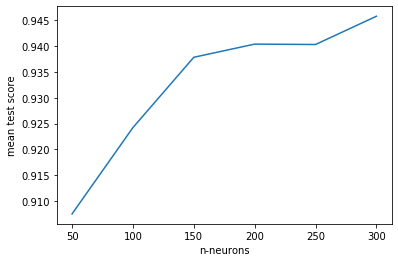

In [13]:
plt.plot([param['neurons'] for param in grid_result.cv_results_['params']], 
         grid_result.cv_results_['mean_test_score'])
plt.ylabel('mean test score')
plt.xlabel('n-neurons')
plt.show()

## Creating CNNs with Keras

<span style="color:red"> <i> Please restart the kernel ("Kernel"-"Restart") and re-load the data. </i></span> <br>

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. This approach neglects any spatial structure in the image. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [7]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 28, 28, 1)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers. Luckily, all we need to do is change the architecture of our DNN.

![alt text](CNN.png "Title")

After we instantiate the model, add the first convolutional layer with 10 filters, which is the dimensionality of output space. (https://keras.io/layers/convolutional/) Here, we will be concerned with local spatial filters
that take as inputs a small spatial patch of the
previous layer at all depths. We consider a three-dimensional kernel of size $5\times5\times1$. Check out this visualization of the
convolution procedure for a square input of unit depth: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
The convolution consists of running this filter over all locations
in the spatial plane. After computing the filter, the output is passed through
a non-linearity, a ReLU.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Subsequently, add a 2D pooling layer. (https://keras.io/layers/pooling/) This pooling layer coarse-grain spatial information by performing
a subsampling at each depth. Here, we use the the max pool operation. In a max pool, the spatial
dimensions are coarse-grained by replacing a small region
(say $2\times2$ neurons) by a single neuron whose output is the
maximum value of the output in the region.

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3386: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Add another convolutional layers with 20 filters and apply dropout. Then, add another pooling layer and flatten the data. You can do DNNs afterwards and compile the model.

In [10]:
# add second convolutional layer with 20 filters
model.add(Conv2D(20, (5, 5), activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten data
model.add(Flatten())
# add a dense all-to-all relu layer
model.add(Dense(20*4*4, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2888: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1205: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:27

Lastly, train your CNN and evaluate the model.

In [11]:
# training parameters
batch_size = 64
epochs = 10

# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

WARNING  | deprecation.py:323 | From /srv/app/venv/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:899: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:625: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s - loss: 0.3151 - acc: 0.9001 - val_loss: 0.1033 - val_acc: 0.9778
Epoch 2/10
40000/40000 [==============================] - 10s - loss: 0.1040 - acc: 0.9666 - val_loss: 0.0692 - val_acc: 0.9823
Epoch 3/10
40000/40000 [==============================] - 10s - loss: 0.0810 - acc: 0.9750 - val_loss: 0.0512 - val_acc: 0.9887
Epoch 4/10
40000/40000 [==============================] - 11s - loss: 0.0670 - acc: 0.9792 - val_loss: 0.0466 - val_acc: 0.9879
Epoch 5/10
40000/40000 [==============================] - 10s - loss: 0.0599 - acc: 0.9813 - val_loss: 0.0426 - val_acc: 0.9886
Epoch 6/10
40000/40000 [==============================] - 10s - loss: 0.0534 - acc: 0.9830 - val_loss: 0.0385 - val_acc: 0.9895
Epoch 7/10
40000/40000 [==============================] - 10s - loss: 0.0486 - acc: 0.9847 - val_loss: 0.0352 - val_acc: 0.9905
Epoch 8/10
40000/40000 [==============================

<span style="color:blue"> <i> 5. Do the grid search over any 3 different optimization schemes and 2 activation functions. Suppose that we have a 2 convolutional layers with 10 neurons. Let p_dropout = 0.5, epochs = 1, and batch_size = 64. Determine which combination of optimization scheme, activation function, and number of neurons gives the best accuracy. </i></span> <br>

<span style="color:red"> <i> Doing the grid search requires quite a bit of memory. Please restart the kernel ("Kernel"-"Restart") and re-load the data before doing a new grid search. </i></span> <br>

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# CONFUSED ON THE WORDING OF THE PROBLEM.
# 2 CONVOLUTIONAL LAYERS WITH 10 FILTERS AND AN ARBITRARY AMOUNT OF NEURONS IN DENSE LAYER?
# OR 2 CONVOLUTIONAL LAYERS WITH AN ARBITRARY AMOUNT OF FILTERS AND 10 NEURONS IN DENSE LAYER?
def create_CNN(optimizer='Adam', activation='relu'):
    model = Sequential()
    model.add(Conv2D(5, kernel_size=(5, 5),
                         activation=activation,
                         input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(25, (5, 5), activation=activation))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])

    return model

In [13]:
# Inspiration: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_CNN, 
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer and activation function
optimizer = ['SGD', 'RMSprop', 'Adagrad']
activation = ['relu', 'tanh']
# define parameter dictionary
param_grid = dict(optimizer=optimizer,  activation=activation)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

Epoch 1/1
10000/10000 [==============================] - 1s     
Epoch 1/1
10000/10000 [==============================] - 1s     
Epoch 1/1
40000/40000 [==============================] - 9s - loss: 1.5532 - acc: 0.4052     


In [14]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.894250 using {'activation': 'relu', 'optimizer': 'RMSprop'}
0.667425 (0.075018) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.894250 (0.011113) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.885275 (0.029421) with: {'activation': 'relu', 'optimizer': 'Adagrad'}
0.743000 (0.028094) with: {'activation': 'tanh', 'optimizer': 'SGD'}
0.868500 (0.012131) with: {'activation': 'tanh', 'optimizer': 'RMSprop'}
0.865250 (0.019760) with: {'activation': 'tanh', 'optimizer': 'Adagrad'}


<span style="color:blue"> <i> 6. Create an arbitrary DNN (you are free to choose any activation function, optimization scheme, etc) and evaluate its performance. Then, add two convolutional layers and pooling layers and evaluate its performance again. How do they compare? </i></span> <br>

In [7]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels 

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train[:40000]
Y_train = Y_train[:40000]

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

In [8]:
##### DNN #####
# convert class vectors to binary class matrices

print("before conversion - ")
print("y vector : \n", Y_train[0:10])

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print("after conversion - ")
print("y vector : \n", Y_train[0:10])
print()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

before conversion - 
y vector : 
 [5 0 4 1 9 2 1 3 1 4]
after conversion - 
y vector : 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

X_train shape: (40000, 784)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(img_rows*img_cols,),))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:58: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:442: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3543: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2888: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
WARNING  |

In [10]:
# training parameters
batch_size = 64
epochs = 10

# train CNN
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

WARNING  | deprecation.py:323 | From /srv/app/venv/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:899: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:625: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s - loss: 0.4189 - acc: 0.8761 - val_loss: 0.1558 - val_acc: 0.9516
Epoch 2/10
40000/40000 [==============================] - 3s - loss: 0.1726 - acc: 0.9499 - val_loss: 0.1169 - val_acc: 0.9634
Epoch 3/10
40000/40000 [==============================] - 3s - loss: 0.1235 - acc: 0.9644 - val_loss: 0.0950 - val_acc: 0.9708
Epoch 4/10
40000/40000 [==============================] - 3s - loss: 0.0925 - acc: 0.9737 - val_loss: 0.0930 - val_acc: 0.9722
Epoch 5/10
40000/40000 [==============================] - 3s - loss: 0.0752 - acc: 0.9780 - val_loss: 0.0874 - val_acc: 0.9722
Epoch 6/10
40000/40000 [==============================] - 2s - loss: 0.0614 - acc: 0.9817 - val_loss: 0.0755 - val_acc: 0.9790
Epoch 7/10
40000/40000 [==============================] - 2s - loss: 0.0510 - acc: 0.9839 - val_loss: 0.0685 - val_acc: 0.9798
Epoch 8/10
40000/40000 [==============================] - 2s 

 9120/10000 [==========================>...] - ETA: 0sTest loss: 0.08550609302181292
Test accuracy: 0.977


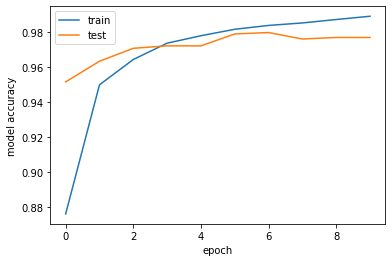

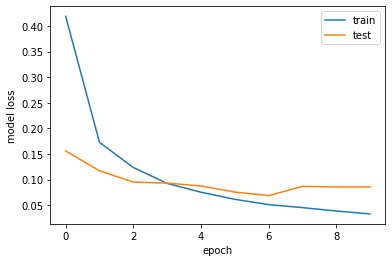

In [11]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [12]:
##### CNN #####
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 28, 28, 1)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(50, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

WARNING  | module_wrapper.py:139 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3386: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

WARNING  | deprecation.py:506 | From /srv/app/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1205: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
# training parameters
batch_size = 64
epochs = 10

# train CNN
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 20s - loss: 0.3501 - acc: 0.8913 - val_loss: 0.0825 - val_acc: 0.9793
Epoch 2/10
40000/40000 [==============================] - 19s - loss: 0.1009 - acc: 0.9719 - val_loss: 0.0521 - val_acc: 0.9867
Epoch 3/10
40000/40000 [==============================] - 19s - loss: 0.0759 - acc: 0.9788 - val_loss: 0.0438 - val_acc: 0.9867
Epoch 4/10
40000/40000 [==============================] - 18s - loss: 0.0626 - acc: 0.9826 - val_loss: 0.0378 - val_acc: 0.9884
Epoch 5/10
40000/40000 [==============================] - 18s - loss: 0.0489 - acc: 0.9861 - val_loss: 0.0326 - val_acc: 0.9899
Epoch 6/10
40000/40000 [==============================] - 19s - loss: 0.0466 - acc: 0.9870 - val_loss: 0.0321 - val_acc: 0.9899
Epoch 7/10
40000/40000 [==============================] - 18s - loss: 0.0431 - acc: 0.9878 - val_loss: 0.0292 - val_acc: 0.9924
Epoch 8/10
40000/40000 [==============================

10000/10000 [==============================] - 1s     
Test loss: 0.025095377806032774
Test accuracy: 0.9926


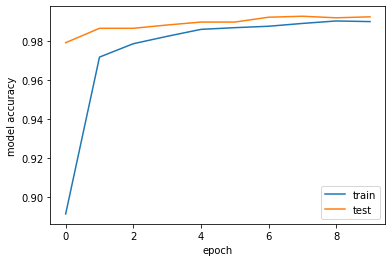

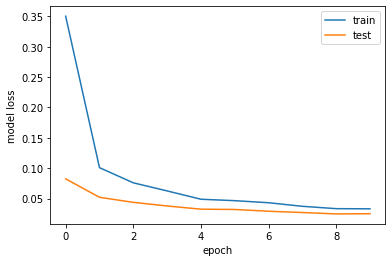

In [15]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Answer:

DNN: As the number of epoch increases, the accuracy and loss of the training data surpasses the testing data at a point.

CNN: As the number of epoch increases, the accuracy and loss of the training data approaches the testing data but does NOT surpass it.

These observations imply that the DNN is limited in it's ability to learn from a data set and that the CNN is the superior choice for greater epochs. But, the CNN takes quite a bit more time than the DNN.

#### Problem 2 - Using Tensorflow - Ising Model

<span style="color:red"> <i> You should restart the kernel for Problem 2. </i></span> <br>

Next, we show how one can use deep neural nets to classify the states of the 2D Ising model according to their phase. This should be compared with the use of logistic-regression in HW8.

The Hamiltonian for the classical Ising model is given by

$$ H = -J\sum_{\langle ij\rangle}S_{i}S_j,\qquad \qquad S_j\in\{\pm 1\} $$

where the lattice site indices $i,j$ run over all nearest neighbors of a 2D square lattice, and $J$ is some arbitrary interaction energy scale. We adopt periodic boundary conditions. Onsager proved that this model undergoes a phase transition in the thermodynamic limit from an ordered ferromagnet with all spins aligned to a disordered phase at the critical temperature $T_c/J=2/\log(1+\sqrt{2})\approx 2.26$. For any finite system size, this critical point is expanded to a critical region around $T_c$.

### Step 1: Load and Process the Data

We begin by writing a `DataSet` class and two functions `read_data_sets` and `load_data` to process the 2D Ising data. 

The `DataSet` class performs checks on the data shape and casts the data into the correct data type for the calculation. It contains a function method called `next_batch` which shuffles the data and returns a mini-batch of a pre-defined size. This structure is particularly useful for the training procedure in TensorFlow.

In [3]:
# -*- coding: utf-8 -*-
from __future__ import absolute_import, division, print_function
import numpy as np
seed=12
np.random.seed(seed)
import sys, os, argparse
import tensorflow as tf
from tensorflow.python.framework import dtypes
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.set_random_seed(seed)

In [4]:
class DataSet(object):

    def __init__(self,data_X,data_Y,dtype=dtypes.float32):
        """Checks data and casts it into correct data type. """

        dtype = dtypes.as_dtype(dtype).base_dtype
        if dtype not in (dtypes.uint8, dtypes.float32):
            raise TypeError('Invalid dtype %r, expected uint8 or float32' % dtype)

        assert data_X.shape[0] == data_Y.shape[0], ('data_X.shape: %s data_Y.shape: %s' % (data_X.shape, data_Y.shape))
        self.num_examples = data_X.shape[0]

        if dtype == dtypes.float32:
            data_X = data_X.astype(np.float32)
        self.data_X = data_X
        self.data_Y = data_Y 

        self.epochs_completed = 0
        self.index_in_epoch = 0

    def next_batch(self, batch_size, seed=None):
        """Return the next `batch_size` examples from this data set."""

        if seed:
            np.random.seed(seed)

        start = self.index_in_epoch
        self.index_in_epoch += batch_size
        if self.index_in_epoch > self.num_examples:
            # Finished epoch
            self.epochs_completed += 1
            # Shuffle the data
            perm = np.arange(self.num_examples)
            np.random.shuffle(perm)
            self.data_X = self.data_X[perm]
            self.data_Y = self.data_Y[perm]
            # Start next epoch
            start = 0
            self.index_in_epoch = batch_size
            assert batch_size <= self.num_examples
        end = self.index_in_epoch

        return self.data_X[start:end], self.data_Y[start:end]

Now, load the Ising dataset, and splits it into three subsets: ordered, critical and disordered, depending on the temperature which sets the distribution they are drawn from. Once again, we use the ordered and disordered data to create a training and a test data set for the problem. Classifying the states in the critical region is expected to be harder and we only use this data to test the performance of our model in the end.

In [5]:
import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import collections

L=40 # linear system size

# load data
fac = 25
file_name = "Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = data[::fac]
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

# divide data into ordered, critical and disordered
X_ordered=data[:int(70000/fac),:]
Y_ordered=labels[:70000][::fac]

X_critical=data[int(70000/fac):int(100000/fac),:]
Y_critical=labels[70000:100000][::fac]

X_disordered=data[int(100000/fac):,:]
Y_disordered=labels[100000:][::fac]

del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered)) #np.concatenate((X_ordered,X_critical,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered)) #np.concatenate((Y_ordered,Y_critical,Y_disordered))

del X_ordered, X_disordered, Y_ordered, Y_disordered

Using TensorFlow backend.


In [6]:
# pick random data points from ordered and disordered states to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.6)

# make data categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Y_critical=to_categorical(Y_critical)

# create data sets
train = DataSet(X_train, Y_train, dtype=dtypes.float32)
test = DataSet(X_test, Y_test, dtype=dtypes.float32)
critical = DataSet(X_critical, Y_critical, dtype=dtypes.float32)

Datasets = collections.namedtuple('Datasets', ['train', 'test', 'critical'])
Dataset = Datasets(train=train, test=test, critical=critical)

You can load the training data in the following way: (Dataset.train.data_X, Dataset.train.data_Y).

### Steps 2+3: Define the Neural Net and its Architecture, Choose the Optimizer and the Cost Function

We can now move on to construct our deep neural net using TensorFlow. 

Unique for TensorFlow is creating placeholders for the variables of the model, such as the feed-in data `X` and `Y` or the dropout probability `dropout_keepprob` (which has to be set to unity explicitly during testing). Another peculiarity is using the `with` scope to give names to the most important operators. While we do not discuss this here, TensorFlow also allows one to visualise the computational graph for the model (see package documentation on [https://www.tensorflow.org/](https://www.tensorflow.org/)).

The shape of X is only partially defined. We know that it will be a matrix, with instances along the first dimension and features along the second dimension, and we know that the number of features is going to be $28\times28$, but we don't know yet how many instances each training batch will contain. So the shape of X is (None, n_inputs). Similarly, we know that Y will be a vector with one entry per instance, but again we don't know the size of the training batch, so the shape is (None).

In [7]:
L=40 # system linear size
n_feats=L**2 # 40x40 square lattice
n_categories=2 # 2 Ising phases: ordered and disordered

n_hidden1 = 300
n_hidden2 = 100
n_outputs = 2

with tf.name_scope('data'):
    X=tf.placeholder(tf.float32, shape=(None,n_feats))
    Y=tf.placeholder(tf.float32, shape=(None,n_categories))
    dropout_keepprob=tf.placeholder(tf.float32)

To classify whether a given spin configuration is in the ordered or disordered phase, we construct a minimalistic model for a DNN with a single hidden layer containing $N_\mathrm{neurons}$ (which is kept variable so we can try out the performance of different sizes for the hidden layer). 

Let us use a neuron_layer() function to create layers in the neural nets.

1. First, create a name scope using the name of the layer.
2. Get the number of inputs by looking up the input matrix's shape and getting the size of the second dimension.
3. Create a $W$ variable which holds the weight matrix (i.e. kernel).  Initialize it randomly, using a truncated normal distribution. 
4. Create a $b$ variable for biases, initialized to 0.
5. Create a subgraph to compute $Z=XW+b$
6. Use activation function if provided.

In [8]:
def neuron_layer(X, n_neuron, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neuron)
        init = tf.truncated_normal((n_inputs, n_neuron), stddev = stddev)
        W = tf.Variable(init, name = "kernel")
        b = tf.Variable(tf.zeros([n_neuron]), name = "bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

Using a neuron_layer() function, create two hidden layers and an output layer. The first hidden layer takes X as its input, and the second takes the output of the first hidden layer as its input. Finally, the output layer takes the output of the second hidden layer as its input.


In [9]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs)

WARNING  | deprecation.py:323 | From <ipython-input-9-4ac0ef9e75ed>:2: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.Dense instead.
WARNING  | deprecation.py:323 | From /srv/app/venv/lib/python3.6/site-packages/tensorflow_core/python/layers/core.py:187: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


Then, define the cost function that we will use to train the neural net model. Here, use the cross entropy to penalize models that estimate a low probability for the target class.

In [10]:
with tf.name_scope('loss'):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
    loss = tf.reduce_mean(xentropy)

WARNING  | deprecation.py:323 | From <ipython-input-10-f11165011709>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Then, define a GradientDescentOptimizer that will tweak the model parameters to minimize the cost function. Now, set learning_rate = 1e-6. 

In [11]:
learning_rate = 1e-6
with tf.name_scope('optimiser'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

Lastly, specify how to evaluate the model. Let us simply use accuracy as our performance measure.

In [12]:
with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
#     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(correct_prediction)

### Steps 4+5: Train the Model and Evaluate its Performance

We train our DNN using mini-batches of size $100$ over a total of $100$ epochs, which we define first. We then set up the optimizer parameter dictionary `opt_params`, and use it to create a DNN model. 

Running TensorFlow requires opening up a `Session` which we abbreviate as `sess` for short. All operations are performed in this session by calling the `run` method. First, we initialize the global variables in TensorFlow's computational graph by running the `global_variables_initializer`. To train the DNN, we loop over the number of epochs. In each fix epoch, we use the `next_batch` function of the `DataSet` class we defined above to create a mini-batch. The forward and backward passes through the weights are performed by running the `loss` and `optimizer` methods. To pass the mini-batch as well as any other external parameters, we use the `feed_dict` dictionary. Similarly, we evaluate the model performance, by getting `accuracy` on the same minibatch data. Note that the dropout probability for testing is set to unity. 

Once we have exhausted all training epochs, we test the final performance on the entire training, test and critical data sets. This is done in the same way as above.

Last, we return the loss and accuracy for each of the training, test and critical data sets.

In [13]:
training_epochs=100
batch_size=100

with tf.Session() as sess:

    # initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())

    # train the DNN
    for epoch in range(training_epochs): 

        batch_X, batch_Y = Dataset.train.next_batch(batch_size)

        sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})
        

    # test DNN performance on entire train test and critical data sets
    train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.train.data_X, 
                                                           Y: Dataset.train.data_Y,
                                                           dropout_keepprob: 0.5}
                                                            )
    print("train loss/accuracy:", train_loss, train_accuracy)

    test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.test.data_X,
                                                           Y: Dataset.test.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )

    print("test loss/accuracy:", test_loss, test_accuracy)

    critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                feed_dict={X: Dataset.critical.data_X,
                                                           Y: Dataset.critical.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )
    print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

train loss/accuracy: 0.87729883 0.5048076923076923
test loss/accuracy: 0.8700544 0.5192307692307693
crtitical loss/accuracy: 0.8785668 0.4975


### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

To study the dependence of our DNN on some of the hyperparameters, we do a grid search over the number of neurons (initially set as 100) in the hidden layer, and different SGD learning rates (initially set as 1e-6). These searches are best done over logarithmically-spaced points. 

To do this, define a function for creating a DNN model: `create_DNN` and for evaluating the performance: `evaluate_model`.

The function `grid_search` will output 2D heat map to show how accuracy changes with learning rate and number of neurons. 

In [14]:
def create_DNN(n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
        logits = tf.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy

In [15]:
def evaluate_model(neurons,lr):
    
    training_epochs=100
    batch_size=100

    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(n_hidden1=neurons, n_hidden2=neurons, learning_rate=lr)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [16]:
def grid_search():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learning rate and number of hidden neurons
    N_neurons=[100, 200, 300, 400, 500]
    learning_rates=np.logspace(-6,-1,6)

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(N_neurons),len(learning_rates)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, neurons in enumerate(N_neurons):
        for j, lr in enumerate(learning_rates):

            print("training DNN with %4d neurons and SGD lr=%0.6f." %(neurons,lr) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(neurons,lr)

    plot_data(learning_rates,N_neurons,train_accuracy, "training data")
    plot_data(learning_rates,N_neurons,test_accuracy, "test data")
    plot_data(learning_rates,N_neurons,critical_accuracy, "critical data")

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_data(x, y, data, title):

    # plot results
    fontsize=16

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]

    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    
    ax.set_title(title,fontsize=fontsize)

    plt.tight_layout()

    plt.show()

training DNN with  100 neurons and SGD lr=0.000001.
train loss/accuracy: 0.82793516 0.49775641025641026
test loss/accuracy: 0.83035684 0.49615384615384617
crtitical loss/accuracy: 0.82890534 0.4925
training DNN with  100 neurons and SGD lr=0.000010.
train loss/accuracy: 0.88264924 0.5326923076923077
test loss/accuracy: 0.89217484 0.5201923076923077
crtitical loss/accuracy: 0.7694872 0.5933333333333334
training DNN with  100 neurons and SGD lr=0.000100.
train loss/accuracy: 0.9958069 0.5375
test loss/accuracy: 1.0384365 0.5091346153846154
crtitical loss/accuracy: 0.8199654 0.6366666666666667
training DNN with  100 neurons and SGD lr=0.001000.
train loss/accuracy: 0.6832753 0.5881410256410257
test loss/accuracy: 0.7038822 0.5735576923076923
crtitical loss/accuracy: 0.7077169 0.5758333333333333
training DNN with  100 neurons and SGD lr=0.010000.
train loss/accuracy: 0.22903547 0.9596153846153846
test loss/accuracy: 0.2692034 0.9432692307692307
crtitical loss/accuracy: 0.4914099 0.7675
tra

<IPython.core.display.Javascript object>


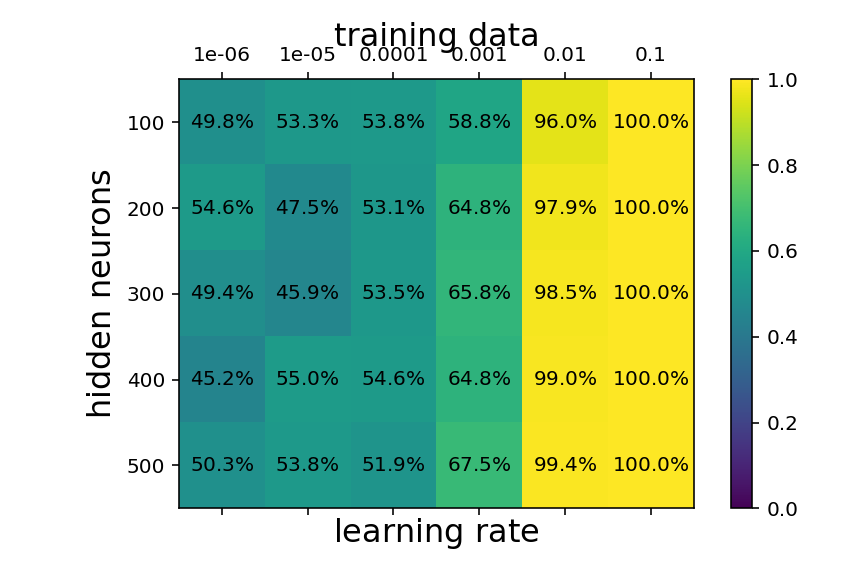

<IPython.core.display.Javascript object>


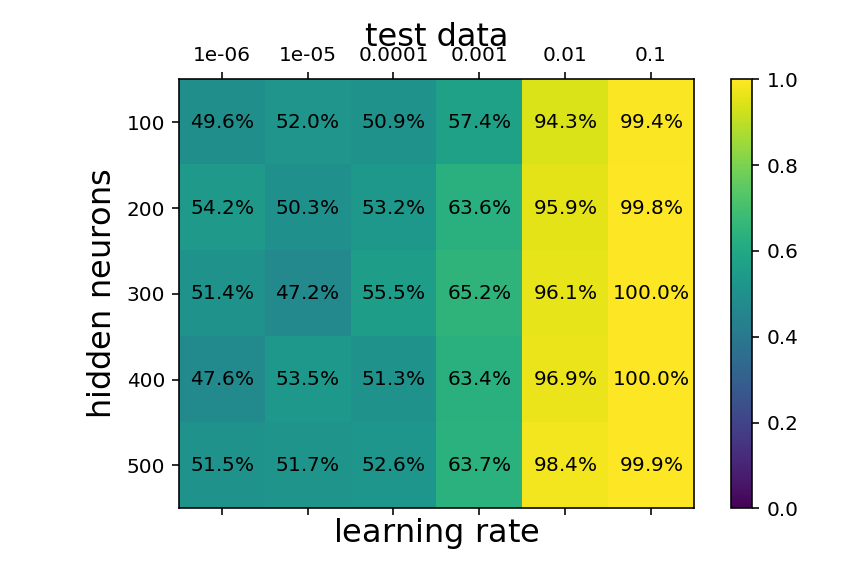

<IPython.core.display.Javascript object>


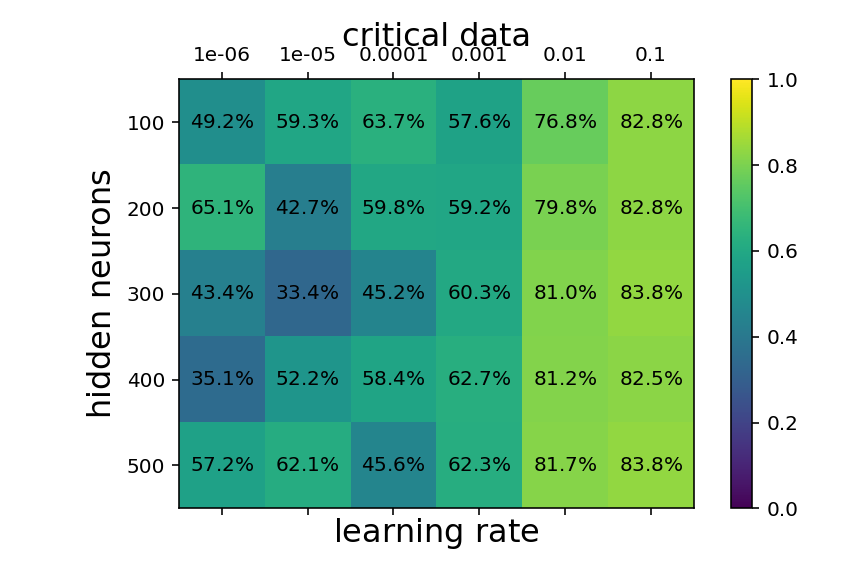

In [18]:
grid_search()

<span style="color:blue"> <i> 1. Do the grid search over 5 different types of activation functions (https://www.tensorflow.org/api_guides/python/nn#Activation_Functions). Evaluate the performance for each case and determine which gives the best accuracy. You can assume an arbitrary DNN. Show results for training, test, and critical data. </i></span> <br>

In [19]:
def create_DNN(activation=tf.nn.relu):

    n_hidden1=100
    n_hidden2=100
    learning_rate=1e-6

    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = activation)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = activation)
        logits = tf.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy

In [20]:
def evaluate_model(activation=tf.nn.relu):
    
    training_epochs=100
    batch_size=100

    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(activation=activation)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [21]:
def grid_search():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learning rate and number of hidden neurons
    activation = [tf.nn.relu, tf.nn.tanh, tf.nn.elu, tf.nn.sigmoid, tf.nn.softmax]

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros(len(activation),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, fn in enumerate(activation):

        print("training DNN with activation function %s" %(fn) )

        train_loss[i],train_accuracy[i],\
        test_loss[i],test_accuracy[i],\
        critical_loss[i],critical_accuracy[i] = evaluate_model(fn)
        print()

In [22]:
grid_search()

training DNN with activation function <function relu at 0x7f15b6a27620>
train loss/accuracy: 0.8176016 0.507051282051282
test loss/accuracy: 0.8275351 0.49615384615384617
crtitical loss/accuracy: 0.8637138 0.4891666666666667

training DNN with activation function <function tanh at 0x7f15b6c966a8>
train loss/accuracy: 0.8424024 0.4891025641025641
test loss/accuracy: 0.8253709 0.5004807692307692
crtitical loss/accuracy: 0.8114258 0.5033333333333333

training DNN with activation function <function elu at 0x7f15b6aa9d08>
train loss/accuracy: 0.9371766 0.5051282051282051
test loss/accuracy: 0.94762576 0.5091346153846154
crtitical loss/accuracy: 0.9338437 0.5158333333333334

training DNN with activation function <function sigmoid at 0x7f15b6a44620>
train loss/accuracy: 0.914804 0.4532051282051282
test loss/accuracy: 0.89160544 0.4740384615384615
crtitical loss/accuracy: 1.0559033 0.3333333333333333

training DNN with activation function <function softmax at 0x7f15b6634268>
train loss/accurac

<span style="color:blue"> <i> 2. Do the grid search over 5 different numbers of epochs and batch sizes. Make a 2D heat map as shown in the example. You can assume an arbitrary DNN. Show results for training, test, and critical data.  </i></span> <br>

In [23]:
def create_DNN():

    n_hidden1=100
    n_hidden2=100
    learning_rate=1e-6

    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
        logits = tf.layers.dense(hidden2, n_outputs)
        
    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)
        
    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)
        
    return X, Y, dropout_keepprob, loss, optimizer, accuracy

In [24]:
def evaluate_model(training_epochs=1, batch_size=10):

    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN()
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs): 

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.train.data_X, 
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy], 
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [25]:
def grid_search():
    """This function performs a grid search over a set of different learning rates 
    and a number of hidden layer neurons."""

    # perform grid search over learning rate and number of hidden neurons
    epochs = [1, 2, 3, 4, 5]
    batch_size = [10, 30, 50, 100]

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(epochs),len(batch_size)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, e in enumerate(epochs):
        for j, batch in enumerate(batch_size):

            print("training DNN with %d epochs and batch_size %d." %(e, batch) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(e, batch)
            print()

    plot_data(batch_size,epochs,train_accuracy, "training data")
    plot_data(batch_size,epochs,test_accuracy, "test data")
    plot_data(batch_size,epochs,critical_accuracy, "critical data")

training DNN with 1 epochs and batch_size 10.
train loss/accuracy: 0.88136923 0.5708333333333333
test loss/accuracy: 0.92431927 0.5427884615384615
crtitical loss/accuracy: 0.76648587 0.6691666666666667

training DNN with 1 epochs and batch_size 30.
train loss/accuracy: 0.78998995 0.4814102564102564
test loss/accuracy: 0.8097521 0.46778846153846154
crtitical loss/accuracy: 0.8413885 0.44083333333333335

training DNN with 1 epochs and batch_size 50.
train loss/accuracy: 0.8290422 0.5115384615384615
test loss/accuracy: 0.85920906 0.49230769230769234
crtitical loss/accuracy: 0.7197444 0.5941666666666666

training DNN with 1 epochs and batch_size 100.
train loss/accuracy: 0.98611206 0.5439102564102564
test loss/accuracy: 1.0354626 0.5317307692307692
crtitical loss/accuracy: 0.82327837 0.655

training DNN with 2 epochs and batch_size 10.
train loss/accuracy: 0.8651152 0.5060897435897436
test loss/accuracy: 0.8298353 0.5302884615384615
crtitical loss/accuracy: 0.9704431 0.4241666666666667

tr

<IPython.core.display.Javascript object>


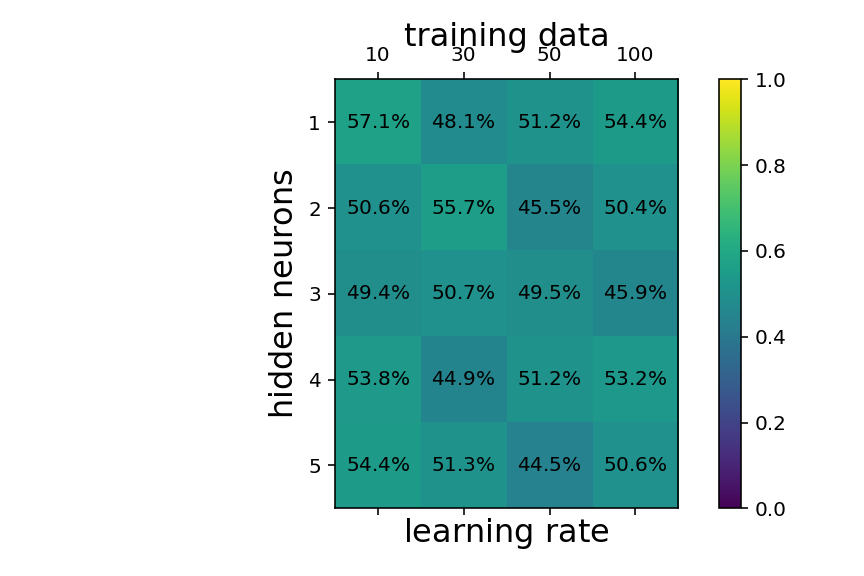

<IPython.core.display.Javascript object>


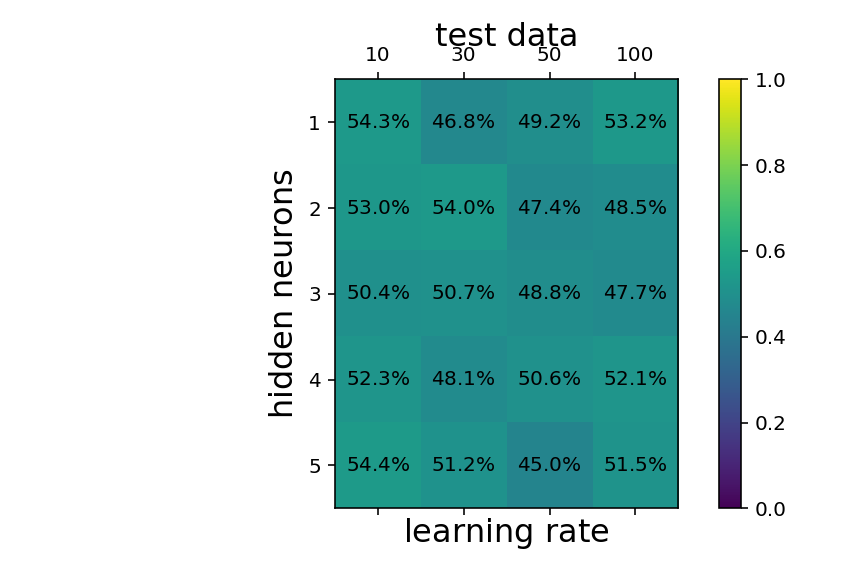

<IPython.core.display.Javascript object>


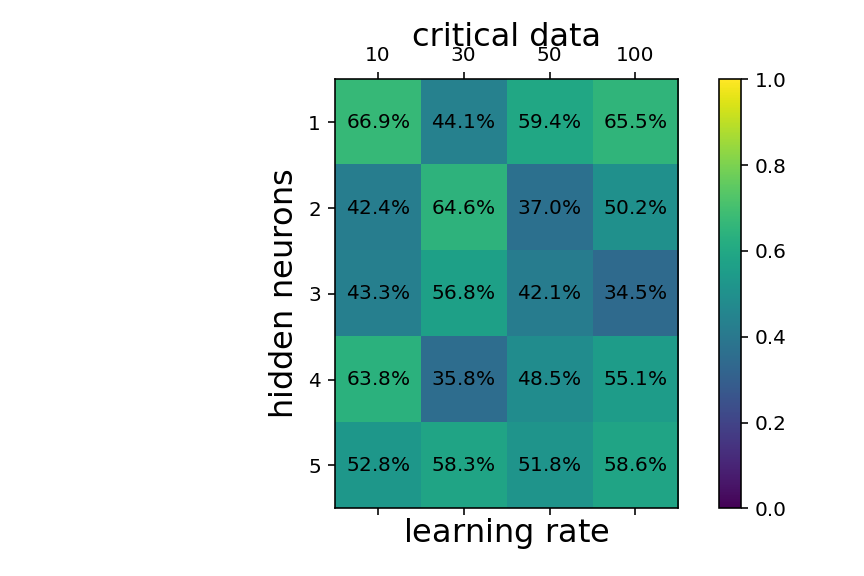

In [26]:
grid_search()

#### Problem 3 - SDSS galaxies


<span style="color:red"> <i> You should restart the kernel for Problem 3. </i></span> <br>


The data is provided in the file <b>"specz_data.txt"</b>. The columns of the file (length of 13) correspond to - <br>
spectroscopic redshift ('zspec'), RA, DEC, magnitudes in 5 bands - u, g, r, i, z (denoted as 'mu,' 'mg,' 'mr,' 'mi,' 'mz' respectively); Exponential and de Vaucouleurs model magnitude fits ('logExp' and 'logDev' http://www.sdss.org/dr12/algorithms/magnitudes/); zebra fit ('pz_zebra); Neural Network fit ('pz_NN') and its error estimate ('pz_NN_Err') <br>

We will undertake 2 exercises  - 
- Regression
    - We will use the magnitude of object in different bands ('mu, mg, mr, mi, mz') and do a regression exercise to estimate the redshift of the object. Hence our feature space is 5.
    - The correct redshift is given by 'zspec', which is the spectroscopic redshift of the object. We will use this for training and testing purpose. 
    
    Sidenote: Photometry vs. Spectroscopy
    
    <i>&nbsp; &nbsp; The amount of energy we receive from celestial objects – in the form of radiation – is called the flux, and an astro- nomical technique of measuring the flux is photometry. Flux is usually measured over broad wavelength bands, and with the estimate of the distance to an object, it can infer the object’s luminosity, temperature, size, etc. Usually light is passed through colored filters, and we measure the intensity of the filtered light. 
    
    &nbsp; &nbsp; On the other hand, spectroscopy deals with the spectrum of the emitted light. This tells us what the object is made of, how it is moving, the pressure of the material in it, etc. Note that for faint objects making photometric observation is much easier.
    
    &nbsp; &nbsp; Photometric redshift (photoz) is an estimate of the distance to the object using photometry. Spectroscopic redshift observes the object’s spectral lines and measures their shifts due to the Doppler effect to infer the distance.</i>
    

- Classification
    - We will use the same magnitudes and now also the redshift of the object  ('zspec') to classify the object as either Elleptical or Spiral. Hence our feature space is now 6.
    - The correct class is given by compring 'logExp' and 'logDev' which are the fits for Exponential and Devocular profiles. If logExp > logDev, its a spiral and vice-versa. We will use this for training and testing purpose. Since the classes are not explicitly given, generate a column for those (Classes can be $\pm 1$. If it is $0$, it does not belong to either of the class.)


##### Cleaning

Read in the files to create the data (X and Y) for both regression and classification. <br>
You will have to clean the data - 
- Drop the entries that are nan or infinite
- Drop the unrealistic numbers such as 999, -999; and magnitudes that are unrealistic. Since these are absolute magnitudes, they should be positive and high. Lets choose a magnitude limit of 15 as safe bet.
- For classification, drop the entries that do not belong to either of the class


In [3]:
# Read in and create data

fname = 'specz_data.txt'
spec_dat=np.genfromtxt(fname,names=True)
print(spec_dat.dtype.fields.keys())
# convenience variable
zspec = spec_dat['zspec']
pzNN = spec_dat['pz_NN']
#some N redshifts are not defined
pzNN[pzNN < 0] = np.nan

# For Regression
bands = ['u', 'g', 'r','i', 'z' ]
mlim = 15

xdata = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
bad = (xdata[:, 0] < mlim) | (xdata[:, 1] < mlim) | (xdata[:, 2] < mlim) & (xdata[:, 3] < mlim) | (xdata[:, 4] < mlim)
xdata = xdata[~bad]
xdata[xdata<0] = 0
ydata = zspec[~bad]

# For classification
classes = np.sign(spec_dat['logExp'] - spec_dat['logDev'])
tmp = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
xxdata = np.concatenate([tmp, zspec.reshape(-1, 1)], axis=1)
bad = (classes==0) | (xxdata[:, 0] < mlim) | (xxdata[:, 1] < mlim) | (xxdata[:, 2] < mlim) & (xxdata[:, 3] < mlim) | (xxdata[:, 4] < mlim)
xxdata = xxdata[~bad]
classes = classes[~bad]

dict_keys(['zspec', 'RA', 'DEC', 'mu', 'mg', 'mr', 'mi', 'mz', 'logExp', 'logDev', 'pz_zebra', 'pz_NN', 'pz_NN_Err'])


For regression, X and Y data (called "xdata" and "ydata," respectively) is cleaned magnitudes (5 feature space) and spectroscopic redshifts respectively.
For classification, X and Y data (called "xxdata" and "classes" respectively) is cleaned magnitudes+spectroscopic redshifts respectively (6 feature space) and classes respectively.

In [4]:
print('For Regression:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xdata.shape[0])
print('')
print('For Classification:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xxdata.shape[0])

For Regression:
Before: Size of datasets is  5338
After: Size of datasets is  4535

For Classification:
Before: Size of datasets is  5338
After: Size of datasets is  4147


##### Visualization

The next step should be to visualize the data. <br>
For regression
- Make a histogram for the distribution of the data (spectroscopic redshift). 
- Make 5 2D histograms of the distribution of the magnitude as function of redshift (Hint: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hist2d.html)

For classification <br>
- Make 6 1-d histogram for the distribution of the data (6 features - zspec and 5 magnitudes) for both class 1 and -1 separately 

<span style="color:blue"> <i> 1. Make histograms for both regression and classification. </i></span> <br>

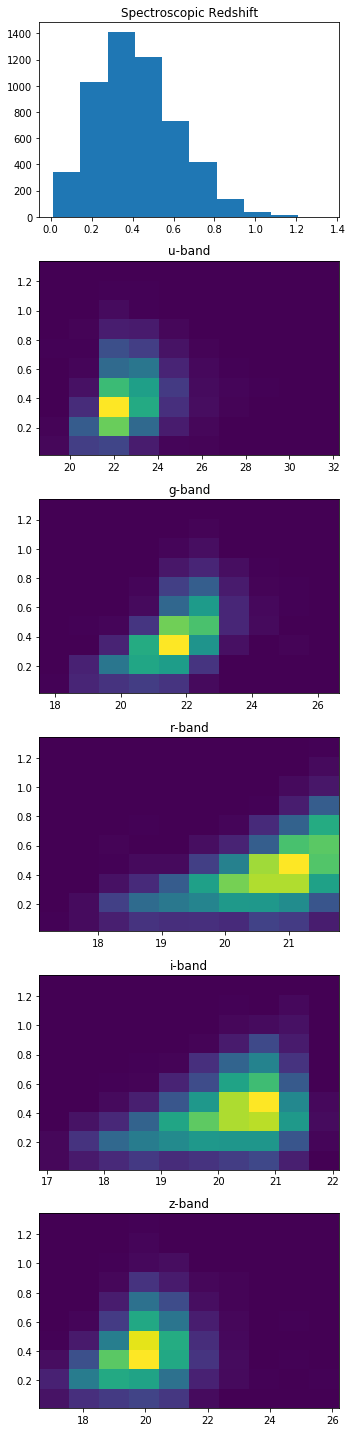

In [5]:
##### REGRESSION #####
fig, axes = plt.subplots(nrows=6, ncols=1, figsize = (5, 20))

# Histogram for the distribution of the data (spectroscopic redshift)
axes[0].hist(zspec)
axes[0].set_title("Spectroscopic Redshift")

# 2D histograms of the distribution of the magnitude as a function of redshift
for i in range(5):
    ax = axes[i+1]
    
    ax.hist2d(xdata[:,i], ydata)
    ax.set_title(bands[i] + '-band')

plt.tight_layout()
plt.show()

In [6]:
# Sorts a given list of elements using a list of classes with respect to each element into two lists
def sort_class(elements, classes):
    class_a = []
    class_b = []
    
    for i in range(len(classes)):
        if classes[i] == 1: class_a.append(elements[i])
        elif classes[i] == -1: class_b.append(elements[i])
            
    return class_a, class_b

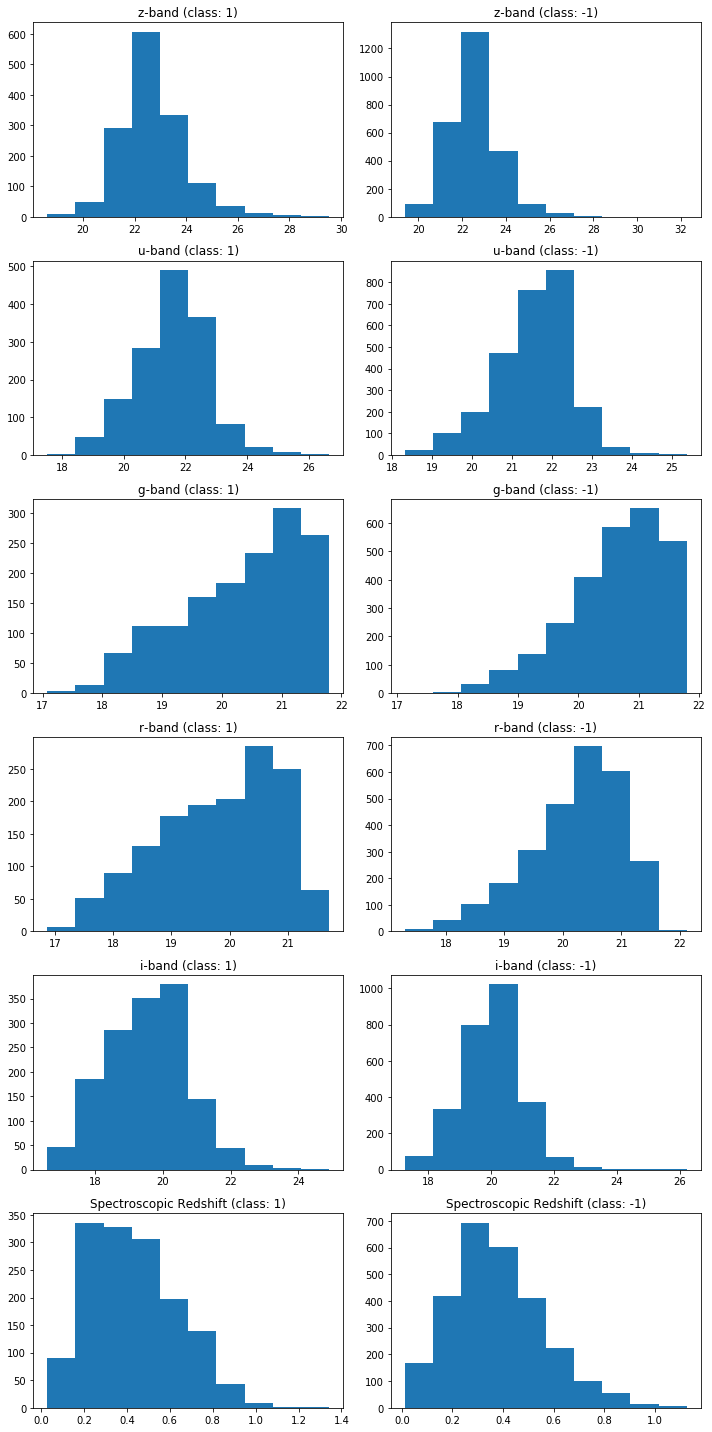

In [7]:
##### CLASSIFICATION #####
# Histograms for each class for the distribution of a given set of data
fig, axes = plt.subplots(nrows=6, ncols=2, figsize = (10, 20))

for i in range(6):
    # Classifies the data (-1 or +1)
    class_a, class_b = sort_class(xxdata[:,i], classes)

    ax1 = axes[i, 0]
    ax1.hist(class_a)
    
    ax2 = axes[i, 1]
    ax2.hist(class_b)
    
    if i == 5:
        ax1.set_title('Spectroscopic Redshift (class: 1)')
        ax2.set_title('Spectroscopic Redshift (class: -1)')
    else:
        ax1.set_title(bands[i - 1] + '-band (class: 1)')
        ax2.set_title(bands[i - 1] + '-band (class: -1)')

plt.tight_layout()
plt.show()

<span style="color:blue"> <i> 2. Do the following preprocessing: </i></span> <br>

#####  Preprocessing:

- Next, split the sample into training data and the testing data. We will be using the training data to train different algorithms and then compare the performance over the testing data. In this project, keep 80% data as training data and uses the remaining 20% data for testing.  <br>
- Often, the data can be ordered in a specific manner, hence shuffle the data prior to splitting it into training and testing samples. <br>
- Many algorithms are also not scale invariant, and hence scale the data (different features to a uniform scale). All this comes under preprocessing the data.
http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing <br>
Use StandardScaler from sklearn (or write your own routine) to center the data to 0 mean and 1 variance. Note that you only center the training data and then use its mean and variance to scale the testing data before using it. <br><br>

Hint: How to get a scaled training data: <br>

1. Let the training data be: train = ("training X data", "training Y data")<br>
2. You can first define a StandardScaler: <br>
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()<br>
3. Then, do the fit: <br>
for regression: scale_xdata.fit(train_regression[0]), scale_ydata.fit(train_regression[1].reshape(-1, 1))<br>
for classication: scale_xdata.fit(train_classification[0])<br>
  Here, no need to fit for y data for classification (it's either +1 or -1. Already scaled)<br>
4. Next, transform: <br>
 for regression: scaled_train_data = (scale_xdata.fit_transform(train_regression[0]), scale_ydata.fit_transform(train_regression[1].reshape(-1, 1)))<br>
 for classication: scaled_train_data = (scale_xdata.fit_transform(train_classification[0]), train_classification[1])<br>
 Again, y data is already scaled for classification.  <br>


Do this for test data as well.


In [8]:
from sklearn import preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(xdata, ydata, train_size = 0.8)

# Scaled training data for regression
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(x_train_reg)
scale_ydata.fit(y_train_reg.reshape(-1, 1))
scaled_train_data_reg = (scale_xdata.fit_transform(x_train_reg), scale_ydata.fit_transform(y_train_reg.reshape(-1, 1)))

# Scaled testing data for regression
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(x_test_reg)
scale_ydata.fit(y_test_reg.reshape(-1, 1))
scaled_test_data_reg = (scale_xdata.fit_transform(x_test_reg), scale_ydata.fit_transform(y_test_reg.reshape(-1, 1)))

In [11]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(xxdata, classes, train_size = 0.8)

# Scaled training data for classification
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(x_train_class)
scaled_train_data_class = (scale_xdata.fit_transform(x_train_class), y_train_class)

# Scaled testing data for classification
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()
scale_xdata.fit(x_test_class)
scaled_test_data_class = (scale_xdata.fit_transform(x_test_class), y_test_class)

##### Metrics

The last remaining preperatory step is to write metric for gauging the performance of the algorithm. Write a function to calculate the 'RMS' error given (y_predict, y_truth) to gauge regression and another function to evaluate accuracy of classification. <br>
In addition, for classification, we will also use confusion matrix.

Below is an example you can use. Feel free to write you own.

In [12]:
from sklearn.metrics import confusion_matrix

def rms(x, y, scale1=None, scale2=None):
    '''Calculate the rms error given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    if scale1 is not None:
        x= scale1.inverse_transform(x)
    if scale2 is not None:
        y = scale2.inverse_transform(y)
    return  np.sqrt(np.mean((x[mask] - y[mask]) ** 2))

def acc(x, y):
    '''Calculate the accuracy given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    return  (x == y).sum()/x.size


#### Hyperparameter method

Now, we will be varying hyperparameters to get the best model and build some intuition. There are various ways to do this and we will use Grid Search methodology (as you did in Problem 1 and 2) which simply tries all the combinations along with some cross-validation scheme. For most part, we will use 4-fold cross validation. <br>
Sklearn provides GridSearchCV functionality for this purpose. <br>

Its recommended to spend some time to go through output format of GridSearchCV and write some utility functions to make the recurring plots for every parameter. <br>
Grid Search returns a dictionary with self explanatory keys for the most part. Mostly, the keys correspond to (masked) numpy arrays of size = #(all possible combination of parameters). The value of individual parameter in every combination is given in arrays with keys starting from 'param_\*' and this should help you to match the combination with the corresponding scores. <br>
For masked arrays, you can access the data values by using \*.data
<br>
<br>
*Do not overwrite these grid search-ed variables (and not only their result) since we will compare all the models together in the end*

In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

<span style="color:red"><i> You can choose to do only one of the two classifiers: kNN or Random Forests.</i></span> <br>
<span style="color:red"><i> If you choose to do Method 2 (Random Forests), take a look at hints from Method 1 (kNN). </i></span> <br>

### <span style="color:red"> Option (1) </span>
### Method 1. k Nearest Neighbors

For regression, let us play with grid search using knn to tune hyperparmeters. (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) Consider the following 3 hyperparameters - 
- Number of neighbors ([2, 3, 5, 10, 15, 20, 25, 50, 100])
- Weights of leaves (Uniform or Inverse Distance weighing)
- Distance metric (Eucledian or Manhattan distance - parameter 'p')

<span style="color:blue"> <i> 1. Do a grid search on these parameters. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value? </i></span> <br>

In [14]:
from sklearn.neighbors import KNeighborsRegressor

Hint: (Read the documentations carefully for more detail.)

First, define the hyperparameters: parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}

Specify the algorithm you want to use: e.g. knnr = KNeighborsRegressor() 

Then, Do a grid search on these parameters using 4 fold cross validation: gcknn = GridSearchCV(knnr, parameters, cv=4)

Do the fit: gcknn.fit(*scaled_training_data) 

(Let "scaled_training_data" be the training data where "scaled_training_data = ("train X data", "train Y data")"

Get results: $results = gcknn.cv_results_$

$cv_results_$ has the following dictionaries: "rank_test_score," "mean_test_score," "std_test_score," and "params" (See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 

Then, you can evaluate the models based on "rank_test_score" and print out their "params," along with their "mean_test_score" and "std_test_score".

In [15]:
parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}

In [16]:
gcknn = GridSearchCV(KNeighborsRegressor(), parameters, cv=4)
gcknn.fit(*scaled_train_data_reg)

results = gcknn.cv_results_

In [17]:
for i in range(results["rank_test_score"].size):
    print("Rank test score:", results["rank_test_score"][i])
    print("Parameters:", results["params"][i])
    print("Mean test score:", results["mean_test_score"][i])
    print("Std test score:", results["std_test_score"][i])
    print()

Rank test score: 35
Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Mean test score: 0.4143303799684695
Std test score: 0.024016497009334902

Rank test score: 33
Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean test score: 0.4278596995251251
Std test score: 0.02536531338741037

Rank test score: 36
Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
Mean test score: 0.40689108192145074
Std test score: 0.03831347813663048

Rank test score: 34
Parameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Mean test score: 0.42628604577110396
Std test score: 0.03349031211051315

Rank test score: 29
Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Mean test score: 0.4616205519485546
Std test score: 0.02438436512690356

Rank test score: 25
Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean test score: 0.4877785257449715
Std test score: 0.019173110129173093

Rank test score: 31
Parameters: {'n_neighbors': 3, 'p': 2, 'weights':

In [18]:
max_index = gcknn.best_index_

print("Rank test score:", gcknn.best_score_)
print("Parameters:", gcknn.best_params_)
print("Mean test score:", results["mean_test_score"][max_index])
print("Std test score:", results["std_test_score"][max_index])

# max_index = results["rank_test_score"].argmin()

# print("Rank test score:", results["rank_test_score"][max_index])
# print("Parameters:", results["params"][max_index])
# print("Mean test score:", results["mean_test_score"][max_index])
# print("Std test score:", results["std_test_score"][max_index])

Rank test score: 0.5799115714576262
Parameters: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Mean test score: 0.5799115714576262
Std test score: 0.012100898775784918


<span style="color:blue"> <i> 2. Also print out fitting and scoring times for all hyperparameter combinations. </i></span> <br>

*Plot timings for fitting and scoring*

Hint: Assume that you got results from: $results = gcknn.cv_results_$

Then, get the scoring time: results['mean_score_time']

and the fitting time: results['mean_fit_time']

In [19]:
print('Scoring times: \n', results['mean_score_time'])
print('Fitting times: \n', results['mean_fit_time'])

Scoring times: 
 [0.00770777 0.00745922 0.0048418  0.00508475 0.00809044 0.00827074
 0.0053885  0.00554454 0.00923043 0.00971508 0.00622237 0.00634199
 0.01189858 0.01200289 0.00814068 0.0080834  0.01413208 0.01695931
 0.00885493 0.00965577 0.01599824 0.01460952 0.00990129 0.01034659
 0.01582545 0.01616764 0.01095992 0.01130539 0.02244371 0.023794
 0.01665664 0.01709116 0.0344404  0.03427482 0.02710617 0.02719438]
Fitting times: 
 [0.00146669 0.0010888  0.00109023 0.0011223  0.0010758  0.00107479
 0.00114834 0.00109333 0.00110012 0.00111097 0.00114113 0.00111973
 0.00110215 0.00111824 0.00119394 0.00121766 0.00116026 0.00126982
 0.00115216 0.0011254  0.00112039 0.00106061 0.00111508 0.00117475
 0.00112182 0.00106984 0.00109518 0.00109816 0.00111562 0.00115943
 0.0012241  0.00123042 0.00116217 0.00110883 0.001136   0.00121462]


<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1 and 2, answer the following questions </i></span> <br>

- Is it always better to use more neighbors?
- Is it better to weigh the leaves, if yes, which distance metric performs better?
- GridCV returns fitting and scoring time for every combination. You will find that scoring time is higher than training time. Why do you think is that the case?

### Answer:

- No, it is not always better to use more neighbors.
- It is better to weigh the leaves. The 'inverse distance' metric performs better.
- Scoring time is higher than fitting time because fitting is based off previous iterations (and thus, possesses previous knowledge) leading to improvement on fitting times; whereas scoring is done without knowledge of previous iterations and leading to sporadic scoring times.

<span style="color:blue"> <i> 4. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. </i></span> <br>

Hint:
Suppose you have two types of hyperparameters: A and B.
Let A = [1, 2] and B = [1, 2, 4, 7, 10].

Then, you have 20 different combination of hyperparameters.

Let A = 1. Then, you can try (A,B) = (1,1), (1,2), (1,4), (1,7), (1,10)
Suppose that the mean score you got for the above combination is [0.7, 0.72, 0.75, 0.77, 0.8].
Similarly, for A = 2, you tried (A,B) = (2,1), (2,2), (2,4), (2,7), (2,10) and obtaind the mean score of [0.8, 0.82, 0.85, 0.87, 0.9].

To better see how changing the value of paramter A affects the performance, you can make the following plot:

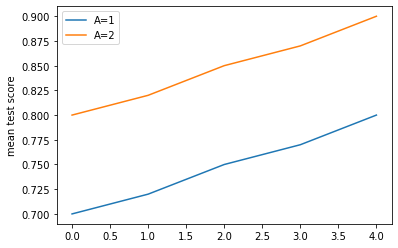

In [20]:
A_1 = [0.7, 0.72, 0.75, 0.77, 0.8]
A_2 = [0.8, 0.82, 0.85, 0.87, 0.9]

plt.plot(A_1, label = "A=1")
plt.plot(A_2, label = "A=2")
plt.ylabel("mean test score")
plt.legend()
plt.show()

This is the plot of the mean test score for A marginalizing over B.

Similarly, make a plot of the mean test score for each kNN hyperparameter.

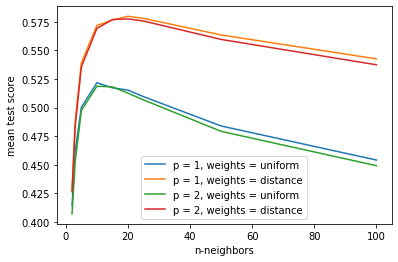

In [21]:
mean_test = np.array([[results['mean_test_score'][i + (4 * j)] for j in range(9)] for i in range(4)])

params = ['p = 1, weights = uniform',
          'p = 1, weights = distance',
          'p = 2, weights = uniform',
          'p = 2, weights = distance']

# Plotting
for i in range(4):
    plt.plot([2, 3, 5, 10, 15, 20, 25, 50, 100], mean_test[i], label = "%s" %(params[i]))
    
plt.xlabel("n-neighbors")
plt.ylabel("mean test score")
plt.legend()
plt.show()

### Answer:

- The 'weights' parameter seems to affect the performance the most (aside from number of neighbors).

<span style="color:blue"> <i> 5. You have determined the best combination of hyperparameters and CV schemes. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>

Hint: To determine the rms error, you need:

Truth: given from data (test_data[1]) <br>
Prediction: gridsearch.predict(test_data[0])
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [22]:
rms_error = rms(gcknn.predict(scaled_test_data_reg[0]), scaled_test_data_reg[1])

print('rms error:', rms_error)


rms error: 0.6854678640250264


#### Classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Here we will look at 4 different type of cross-validation schemes - 
- Kfold
- Stratified Kfold
- Shuffle Split
- Stratified Shuffle Split

<span style="color:blue"> <i> 6. Assuming the list of hyperparameters from Part 1, do 4 different grid searches. From Part 1, take top 5 combination of hyperparameters which gives you the highest accuracy value. Rank the performance of CV schemes for each combination.  </i></span> <br>

In [24]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [25]:
parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}

In [26]:
top_5_parameters = [results["params"][i] for i in results["rank_test_score"].argsort()[:5]]

In [27]:
knnc = KNeighborsClassifier()

#Grid Search
gc = GridSearchCV(knnc, parameters, cv=KFold(4, random_state=100))
#Do the fit
gc.fit(*scaled_train_data_class)

gc2 = GridSearchCV(knnc, parameters, cv=StratifiedKFold(4, random_state = 100))
#Do the fit
gc2.fit(*scaled_train_data_class)

gc3 = GridSearchCV(knnc, parameters, cv=ShuffleSplit(4, 0.1, random_state = 100))
#Do the fit
gc3.fit(*scaled_train_data_class)

gc4 = GridSearchCV(knnc, parameters, cv=StratifiedShuffleSplit(4, 0.1, random_state = 100))
#Do the fit
gc4.fit(*scaled_train_data_class)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=4, random_state=100, test_size=0.1,
            train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 5, 10, 15, 20, 25, 50, 100],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
CVs = ['KFold', 'StratifiedKFold', 'ShuffleSplit', 'StratifiedShuffleSplit']

mean_accuracies = np.zeros((5, 4))
mean_std = np.zeros((5, 4))

for i in range(5):
    print('Rank ' + str(i + 1) + ' parameter set - ' + str(top_5_parameters[i]) + ':')
    gc_index = gc.cv_results_["params"].index(top_5_parameters[i])
    mean_accuracies[i, 0] = gc.cv_results_["mean_test_score"][gc_index]
    mean_std[i, 0] = gc.cv_results_["std_test_score"][gc_index]
    print('Mean test score for KFold:', mean_accuracies[i, 0])
    
    gc2_index = gc2.cv_results_["params"].index(top_5_parameters[i])
    mean_accuracies[i, 1] = gc2.cv_results_["mean_test_score"][gc2_index]
    mean_std[i, 1] = gc2.cv_results_["std_test_score"][gc2_index]
    print('Mean test score for StratifiedKFold:', mean_accuracies[i, 1])
    
    gc3_index = gc3.cv_results_["params"].index(top_5_parameters[i])
    mean_accuracies[i, 2] = gc3.cv_results_["mean_test_score"][gc3_index]
    mean_std[i, 2] = gc3.cv_results_["std_test_score"][gc3_index]
    print('Mean test score for ShuffleSplit:', mean_accuracies[i, 2])
    
    gc4_index = gc4.cv_results_["params"].index(top_5_parameters[i])
    mean_accuracies[i, 3] = gc4.cv_results_["mean_test_score"][gc4_index]
    mean_std[i, 3] = gc4.cv_results_["std_test_score"][gc4_index]
    print('Mean test score for StratifiedShuffleSplit:', mean_accuracies[i, 3])
    
    print('~CV Ranking~')
    sorted_mean_indices = mean_accuracies[i].argsort()[::-1]
    for j in range(4):
        print(str(j + 1) + ' : ' + CVs[sorted_mean_indices[j]] + ' with mean test score:', mean_accuracies[i, sorted_mean_indices[j]])
    
    print()

Rank 1 parameter set - {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}:
Mean test score for KFold: 0.7455532107325897
Mean test score for StratifiedKFold: 0.7470605969249322
Mean test score for ShuffleSplit: 0.7281626506024096
Mean test score for StratifiedShuffleSplit: 0.7326807228915663
~CV Ranking~
1 : StratifiedKFold with mean test score: 0.7470605969249322
2 : KFold with mean test score: 0.7455532107325897
3 : StratifiedShuffleSplit with mean test score: 0.7326807228915663
4 : ShuffleSplit with mean test score: 0.7281626506024096

Rank 2 parameter set - {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}:
Mean test score for KFold: 0.7464576424479952
Mean test score for StratifiedKFold: 0.7467591196864637
Mean test score for ShuffleSplit: 0.7319277108433735
Mean test score for StratifiedShuffleSplit: 0.7349397590361446
~CV Ranking~
1 : StratifiedKFold with mean test score: 0.7467591196864637
2 : KFold with mean test score: 0.7464576424479952
3 : StratifiedShuffleSplit with mean 

<span style="color:blue"> <i> 7. Answer the following questions: </i></span> <br>

- Are the conclusions different for any parameter from the regression case?
- Does the mean accuracy change for different CV schemes?
- Does the standard deviation in mean accuracy change?

In [29]:
print(mean_std)

[[0.00400301 0.0019226  0.00861862 0.01319384]
 [0.00629297 0.00437148 0.00638952 0.00928376]
 [0.00154472 0.00166682 0.00890976 0.0062095 ]
 [0.00717688 0.00468956 0.01490888 0.01192995]
 [0.00626988 0.00440996 0.00928376 0.01192995]]


### Answer:

- The mean accuracy from the classification case seems to be much higher than the regression case.
- The mean accuracy changes for different CV schemes with 'StratifiedKFold' scoring the highest and 'KFold scoring the second highest.
- The standard deviation in mean accuracy changes, as seen in the mean_std ('CV method' x 'parameter set') array above.

<span style="color:blue"> <i> 8. Using the best combination of hyperparameters and CV schemes you have found, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>

Hint: To get a confusion matrix, you need both truth (available from data) and prediction (can be computed using .predict function from GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrx = confusion_matrix(scaled_test_data_class[1], gc4.predict(scaled_test_data_class[0]))
accuracy = acc(gc4.predict(scaled_test_data_class[0]), scaled_test_data_class[1])

In [31]:
print('Confusion Matrix: \n', confusion_matrx)
print('Accuracy:', accuracy)

Confusion Matrix: 
 [[513  35]
 [150 132]]
Accuracy: 0.7771084337349398


### <span style="color:red"> Option (2) </span>
### Method 2. Random Forests

The most important feature of the random forest is the number of trees in the ensemble. We will also play with the maximum depth of the trees.

Try:<br>
n_estimators = [10, 50, 150, 200, 300]<br>
max_depth = [10, 50, 100]<br>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<span style="color:blue"> <i> 1. Do the grid search over n_estimators and max_depth. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value?  </i></span> <br>


In [ ]:
rf = RandomForestRegressor()
parameters = ...

gcrf = GridSearchCV(rf, parameters, cv=5)

...

<span style="color:blue"> <i> 2. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. (plot the mean test score of n_estimators marginalizing over max_depth, etc) </i></span> <br>

In [ ]:
...

<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1, answer the following questions: </i></span> <br>

- Are the scores of these models statistically different? Based on this, which architecture will you choose for your model?
- For every parameter, make the plot for fitting time. Based on this and the previous question, how many trees do you recommend keeping in the ensemble?

In [ ]:
...

##### Answer:


<span style="color:blue"> <i> 4. You have determined the best combination of hyperparameters. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>

In [ ]:
...

#### Classification



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
#Grid search (This will take few minutes)

rfc = RandomForestClassifier()
parameters = ...

gcrfc = GridSearchCV(rfc, parameters, cv=StratifiedShuffleSplit(4, 0.1, random_state = 100))

...

<span style="color:blue"> <i> 5. Assuming the list of hyperparameters from Part 1, do the grid search using StratifiedShuffleSplit CV scheme. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value?  </i></span> <br>

In [ ]:
...

<span style="color:blue"> <i> 6. Using the best combination of hyperparameters, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>

In [ ]:
...

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()